In [ ]:
%pip install gensim
%pip install pandas
%pip install scikit-learn
%pip install textblob
%pip isinstall seaborn
%pip install statsmodels
%pip install matplotlib
%pip install nltk

ERROR: unknown command "isinstall" - maybe you meant "install"


In [ ]:
import nltk
import os, os.path
import nltk.data
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Presentation data analysis

import pandas as pd
file_path = r'app_reviews_with_time_and_version_clue.csv'
df = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the dataframe
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a32b525d-f8d4-4f68-afff-9cdd4d7de8cb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't access analysis to reset my cycle leng...,1,0,164.0,2024-10-20 23:05:36,"Hey, thanks for getting in touch. We’re sorry ...",2024-10-21 07:08:38,164.0
1,99758246-d266-4d43-bd33-9f40a62fb7a7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is great but it's just really annoyin...,3,0,176.0,2024-10-20 21:54:46,"Hey, thanks for your review. We introduced Clu...",2024-10-21 07:06:28,176.0
2,8b99d9bc-f26c-45e0-933b-0c1918f27050,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It requires money,1,0,NaN,2024-10-20 18:52:05,"Hey, thanks for your review. We introduced Clu...",2024-10-21 07:06:26,NaN
3,a2cf1bea-3067-4c42-bb8e-9a72ce280af7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Worst app don't use,1,0,177.1,2024-10-20 14:45:12,"Hey, thanks for your review. We’re sorry to he...",2024-10-21 07:06:57,177.1
4,a4b92428-fc5f-4e6d-be94-32c24c06276d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a good app, but I really don't like that ...",1,0,NaN,2024-10-20 13:39:17,"Hello, we understand you’re disappointed about...",2024-10-21 07:05:14,NaN


In [ ]:
# session 2 Drop rows with missing 'content' as they are not helpful for review analysis
df.dropna(subset=['content'], inplace=True)
# Remove unnecessary columns
df.drop(['userImage'], axis=1, inplace=True)

In [ ]:
# Standardize text data in 'content'
df['content'] = df['content'].str.lower().str.strip()

In [ ]:
# remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remove punctuation
import string
df['content'] = df['content'].str.replace('[{}]'.format(string.punctuation), '')


In [ ]:
# Remove numbers
df['content'] = df['content'].str.replace('\d+', '')

In [ ]:
# Remove mentions
df['content'] = df['content'].replace(r'@\w+', '', regex=True)

In [ ]:
# Remove hashtags
df['content'] = df['content'].replace(r'#\w+', '', regex=True)

In [ ]:
#text analysis

import matplotlib.pyplot as plt

In [ ]:
# 4. Reviews with content longer than 80 characters
reviews_long_content = df[df['content'].str.len() > 80]

In [ ]:
# 5. Reviews with content longer than 80 characters and have replies
reviews_long_content_replied = reviews_long_content[reviews_long_content['replyContent'].notnull()]

In [ ]:
# 6. Reviews with content longer than 80 characters and no replies
reviews_long_content_no_replies = reviews_long_content[reviews_long_content['replyContent'].isnull()]

In [ ]:
# Count the number of reviews in each category
counts = {
    'Total Long Reviews': len(reviews_long_content),
    'Long Reviews with Replies': len(reviews_long_content_replied),
    'Long Reviews without Replies': len(reviews_long_content_no_replies)
}

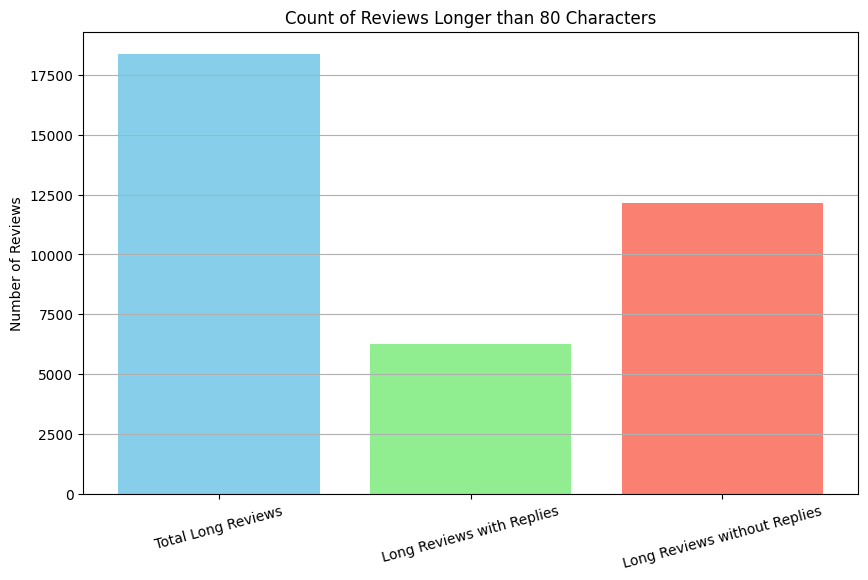

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Count of Reviews Longer than 80 Characters')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=15)
plt.grid(axis='y')

In [ ]:
# 5. Visualization using a box plot for review lengths by score
import seaborn as sns

In [ ]:
# Create a new column 'review_length' that contains the length of each review's content
df['review_length'] = df['content'].apply(len)

<ipython-input-35-8c8d68214b54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='review_length', data=df, palette='Set2')


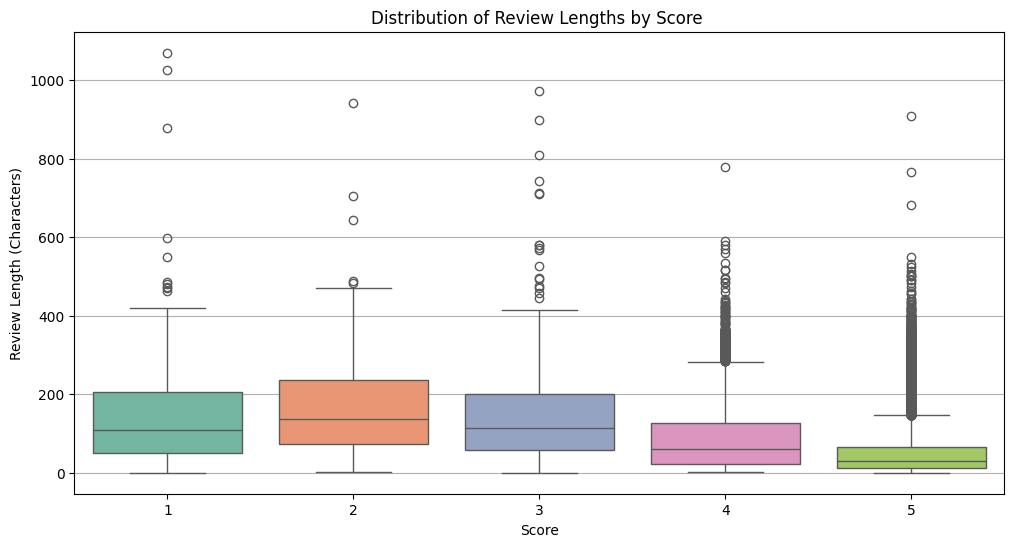

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='score', y='review_length', data=df, palette='Set2')
plt.title('Distribution of Review Lengths by Score ')
plt.xlabel('Score')
plt.ylabel('Review Length (Characters)')
plt.grid(axis='y')

In [ ]:
# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# Perform ANOVA
model = ols('review_length ~ C(score)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                sum_sq       df            F  PR(>F)
C(score)  7.022081e+07      4.0  3494.116862     0.0
Residual  3.281819e+08  65320.0          NaN     NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Ensure the 'review_length' column exists
if 'review_length' not in df.columns:
	df['review_length'] = df['content'].apply(len)

In [ ]:
# Perform Tukey's HSD post hoc test
m_comp = pairwise_tukeyhsd(df['review_length'], df['score'], alpha=0.05) #0.05 is the alpha level, change it if necessary
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     1      2   22.6227    0.0  17.7589   27.4865   True
     1      3     1.918 0.7899  -2.7064    6.5424  False
     1      4  -45.7899    0.0 -49.6068  -41.9729   True
     1      5  -83.9059    0.0 -86.8575  -80.9543   True
     2      3  -20.7047    0.0 -26.1009  -15.3085   True
     2      4  -68.4126    0.0 -73.1352    -63.69   True
     2      5 -106.5286    0.0 -110.584 -102.4733   True
     3      4  -47.7079    0.0 -52.1835  -43.2322   True
     3      5  -85.8239    0.0 -89.5889   -82.059   True
     4      5  -38.1161    0.0 -40.8287  -35.4034   True
--------------------------------------------------------


In [ ]:
#N grams

from nltk import ngrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk import FreqDist
# 1. Combine all reviews into one text:
all_text = " ".join(df['content'].tolist())  # Efficiently join all text

In [ ]:
# 2. Tokenize the combined text:
tokens = nltk.word_tokenize(all_text)

In [ ]:
# 3. Remove Stop Words and Punctuation:
cleaned_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in nltk.corpus.stopwords.words('english')]

In [ ]:
# 4. Get frequent bigrams and trigrams (collocations):
bigram_finder = BigramCollocationFinder.from_words(cleaned_tokens)
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_freq = bigram_finder.ngram_fd.items()
top_10_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

In [ ]:
trigram_finder = TrigramCollocationFinder.from_words(cleaned_tokens)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
trigram_freq = trigram_finder.ngram_fd.items()
top_10_trigrams = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Bigrams:", top_10_bigrams)
print("Top 10 Trigrams:", top_10_trigrams)

Top 10 Bigrams: [(('easy', 'use'), 4986), (('love', 'app'), 4027), (('great', 'app'), 3735), (('keep', 'track'), 2295), (('using', 'app'), 1806), (('track', 'period'), 1567), (('good', 'app'), 1542), (('period', 'tracker'), 1195), (('app', 'really'), 1155), (('app', 'great'), 1150)]
Top 10 Trigrams: [(('helps', 'keep', 'track'), 667), (('app', 'easy', 'use'), 657), (('using', 'app', 'years'), 589), (('best', 'period', 'tracker'), 433), (('period', 'tracking', 'app'), 365), (('keep', 'track', 'period'), 345), (('app', 'great', 'app'), 327), (('helpful', 'easy', 'use'), 318), (('keep', 'track', 'cycle'), 298), (('used', 'app', 'years'), 295)]


In [ ]:
def display_ngrams_table(ngrams, n=2):  # n=2 for bigrams
    ngram_list = []
    for ngram, frequency in ngrams:
        ngram_str = " ".join(ngram)  # Join the tuple of words into a string
        ngram_list.append([ngram_str, frequency]) #append to the list with the ngram and the frequency

    df = pd.DataFrame(ngram_list, columns=[f"{n}-gram", "Frequency"])
    print(df)

print("Top 10 Bigrams:")
display_ngrams_table(top_10_bigrams, 2)

print("\nTop 10 Trigrams:")
display_ngrams_table(top_10_trigrams, 3)

Top 10 Bigrams:
           2-gram  Frequency
0        easy use       4986
1        love app       4027
2       great app       3735
3      keep track       2295
4       using app       1806
5    track period       1567
6        good app       1542
7  period tracker       1195
8      app really       1155
9       app great       1150

Top 10 Trigrams:
                3-gram  Frequency
0     helps keep track        667
1         app easy use        657
2      using app years        589
3  best period tracker        433
4  period tracking app        365
5    keep track period        345
6        app great app        327
7     helpful easy use        318
8     keep track cycle        298
9       used app years        295


In [ ]:
#After pre processing and cleaned tokens, try on own trigram

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [ ]:
# 1. Combine text from reviews where score is 1 or 2:
filtered_df = df[df['score'].isin([1, 2])]
all_text = " ".join(filtered_df['content'].tolist())

In [ ]:
# 2. Tokenize the combined text:
tokens = nltk.word_tokenize(all_text)

In [ ]:
# 3. Initialize Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# 4. Remove Stop Words, Punctuation, and Lemmatize:
stopwords = nltk.corpus.stopwords.words('english')
cleaned_tokens = [
    lemmatizer.lemmatize(word.lower())  # Lemmatize the word
    for word in tokens
    if word.isalpha() and word.lower() not in stopwords
]

In [ ]:
# 5. Get frequent trigrams (collocations):
trigram_finder = TrigramCollocationFinder.from_words(cleaned_tokens)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
trigram_freq = trigram_finder.ngram_fd.items()
top_10_trigrams = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

In [ ]:
# Display as table (using Pandas):
def display_ngrams_table(ngrams, n=4):
    ngram_list = []
    for ngram, frequency in ngrams:
        ngram_str = " ".join(ngram)
        ngram_list.append([ngram_str, frequency])

    df = pd.DataFrame(ngram_list, columns=[f"{n}-gram", "Frequency"])
    print(df)
print("Top 10 trigrams (for scores 1 and 2, lemmatized):")
display_ngrams_table(top_10_trigrams, 3)


Top 10 trigrams (for scores 1 and 2, lemmatized):
                3-gram  Frequency
0       using app year        186
1        used love app        173
2        used app year        150
3      using app since         68
4      every time open         63
5      using clue year         62
6        time open app         53
7      behind pay wall         50
8  period tracking app         45
9    since last update         45
